# Final Cleaning
---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV


from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer, KNNImputer,SimpleImputer
from sklearn.pipeline import Pipeline

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)


In [2]:
df = pd.read_csv('../../data/NH_merged.csv',index_col='Unnamed: 0')

In [3]:
df.shape

(14260, 213)

In [4]:
df.isna().sum().sort_values(ascending=False)[:300]

Removing some of the more unbelievable outliers

In [5]:
df = df[[cols for cols in df if df[cols].isna().sum() <= 8848]]

In [6]:
df.shape

(14260, 166)

In [7]:
df.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Provider Type,Provider Resides in Hospital,Legal Business Name,Date First Approved to Provide Medicare and Medicaid Services,Continuing Care Retirement Community,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Case-Mix Nurse Aide Staffing Hours per Resident per Day,Case-Mix LPN Staffing Hours per Resident per Day,Case-Mix RN Staffing Hours per Resident per Day,Case-Mix Total Nurse Staffing Hours per Resident per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Rating Cycle 1 Standard Survey Health Date,Rating Cycle 1 Total Number of Health Deficiencies,Rating Cycle 1 Number of Standard Health Deficiencies,Rating Cycle 1 Number of Complaint Health Deficiencies,Rating Cycle 1 Health Deficiency Score,Rating Cycle 1 Number of Health Revisits,Rating Cycle 1 Health Revisit Score,Rating Cycle 1 Total Health Score,Rating Cycle 2 Standard Health Survey Date,Rating Cycle 2 Total Number of Health Deficiencies,Rating Cycle 2 Number of Standard Health Deficiencies,Rating Cycle 2 Number of Complaint Health Deficiencies,Rating Cycle 2 Health Deficiency Score,Rating Cycle 2 Number of Health Revisits,Rating Cycle 2 Health Revisit Score,Rating Cycle 2 Total Health Score,Rating Cycle 3 Standard Health Survey Date,Rating Cycle 3 Total Number of Health Deficiencies,Rating Cycle 3 Number of Standard Health Deficiencies,Rating Cycle 3 Number of Complaint Health Deficiencies,Rating Cycle 3 Health Deficiency Score,Rating Cycle 3 Number of Health Revisits,Rating Cycle 3 Health Revisit Score,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,Percent Vaccinated Residents,Percent Vaccinated Healthcare Personnel,Unnamed: 0.1,rpt_rec_num,Facility Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural versus Urban,Fiscal Year Begin Date,Fiscal Year End Date,Type of Control,Total Days Title XVIII,Total Days Title XIX,Total Days Other,Total Days Total,Number of Beds,Total Bed Days Available,Total Discharges Title XVIII,Total Discharges Title XIX,Total Discharges Title Other,Total Discharges Total,SNF Average Length of Stay Title XVIII,SNF Average Length of Stay Title XIX,SNF Average Length of Stay Total,SNF Admissions Title XVIII,SNF Admissions Title XIX,SNF Admissions Other,SNF Admissions Total,SNF Days Title XVIII,SNF Days Title XIX,SNF Days Other,SNF Days Total,SNF Number of Beds,SNF Bed Days Available,SNF Discharges Title XVIII,SNF Discharges Title XIX,SNF Discharges Title Other,SNF Discharges Total,Total RUG Days,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Contract Labor,Cash on hand and in banks,Accoun

We sorted through every column and removed them either due to being too imbalanced, redundant and a cause for extreme multicollinearity, majority null, or otherwise not useful for both modeling and EDA. Although not a pretty method of removal, it was very thorough and collaborative.

In [8]:
df=df.drop(columns={'Provider Address', 'Provider Phone Number', 'Provider SSA County Code','Legal Business Name', 
                 'Case-Mix Nurse Aide Staffing Hours per Resident per Day','Case-Mix LPN Staffing Hours per Resident per Day',
                 'Case-Mix RN Staffing Hours per Resident per Day','Case-Mix Total Nurse Staffing Hours per Resident per Day',
                 'Rating Cycle 2 Standard Health Survey Date','Rating Cycle 2 Total Number of Health Deficiencies', 'Rating Cycle 2 Number of Standard Health Deficiencies',
                 'Rating Cycle 2 Number of Complaint Health Deficiencies', 'Rating Cycle 2 Health Deficiency Score','Rating Cycle 2 Number of Health Revisits','Rating Cycle 2 Health Revisit Score',
                 'Rating Cycle 2 Total Health Score','Rating Cycle 3 Standard Health Survey Date','Rating Cycle 3 Total Number of Health Deficiencies',
                 'Rating Cycle 3 Number of Standard Health Deficiencies','Rating Cycle 3 Number of Complaint Health Deficiencies', 'Rating Cycle 3 Health Deficiency Score',
                 'Rating Cycle 3 Number of Health Revisits','Rating Cycle 3 Health Revisit Score','Rating Cycle 3 Total Health Score','Location','Processing Date','Unnamed: 0.1',
                 'Facility Name','Street Address','City','State Code','Zip Code','County','Medicare CBSA Number','Fiscal Year Begin Date','Fiscal Year End Date','Total Days Title XVIII',
                 'Total Days Title XIX','Total Days Other','Total Days Total','Total Discharges Title XVIII','Total Discharges Title XIX','Total Discharges Title Other',
                 'Total Discharges Total','SNF Average Length of Stay Title XVIII','SNF Average Length of Stay Title XIX',
                 'SNF Average Length of Stay Total','SNF Admissions Title XVIII','SNF Admissions Title XIX','SNF Admissions Other',
                 'SNF Admissions Total','SNF Days Title XVIII','SNF Days Title XIX','SNF Days Other','SNF Days Total','SNF Number of Beds','SNF Bed Days Available',
                 'SNF Discharges Title XVIII','SNF Discharges Title XIX','SNF Discharges Title Other','SNF Discharges Total', 'Less: Allowances for uncollectible notes and accounts receivable',
                 'Leasehold improvements','Other Assets','Total other Assets','Total long term liabilities','Inpatient PPS Amount','Allowable Bad Debts','Buildings','Fixed equipment',
                 'Payroll taxes payable', 'Contract Labor', 'Major movable equipment', 'Other current liabilities', 'Prepaid expenses','Long-Stay QM Rating','Short-Stay QM Rating',
                     'Total RUG Days','Rating Cycle 1 Standard Survey Health Date','Rating Cycle 1 Total Number of Health Deficiencies',
                      'Rating Cycle 1 Number of Standard Health Deficiencies','Rating Cycle 1 Number of Complaint Health Deficiencies', 
                      'Rating Cycle 1 Health Deficiency Score','Rating Cycle 1 Number of Health Revisits', 'Rating Cycle 1 Health Revisit Score',
                      'Rating Cycle 1 Total Health Score', 'rpt_rec_num', 'Type of Control', 'Total Bed Days Available','Total Salaries From Worksheet A',
                      'Cash on hand and in banks','Accounts Receivable','Total Current Assets','Total fixed Assets','Total current liabilities',
                      'General fund balance','Total Liabilities and fund balances', "Less Contractual Allowance and discounts on patients' accounts",
                      "Less Contractual Allowance and discounts on patients' accounts",'Total Other Income'
                })

In [9]:
df['Provider Type'].value_counts(normalize=True)

Medicare and Medicaid    0.949158
Medicare                 0.036676
Medicaid                 0.014165
Name: Provider Type, dtype: float64

In [10]:
df['Provider Resides in Hospital'].value_counts(normalize=True)

N    0.966129
Y    0.033871
Name: Provider Resides in Hospital, dtype: float64

In [11]:
df['Continuing Care Retirement Community'].value_counts(normalize=True)

N    0.893829
Y    0.106171
Name: Continuing Care Retirement Community, dtype: float64

In [12]:
df['Abuse Icon'].value_counts(normalize=True)

N    0.950421
Y    0.049579
Name: Abuse Icon, dtype: float64

In [13]:
df.head(1)

,Federal Provider Number,Provider Name,Provider City,Provider State,Provider Zip Code,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Provider Type,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid Services,Continuing Care Retirement Community,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,Percent Vaccinated Residents,Percent Vaccinated Healthcare Personnel,Rural versus Urban,Number of Beds,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Total Assets,Accounts payable,"Salaries, wages, and fees payable",Total liabilities,Total fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Gross Revenue,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Income,Net Income
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,35653,Franklin,For profit - Corporation,57,53.2,Medicare and Medicaid,N,9/1/1969,N,N,Y,N,Both,Yes,5.0,5.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333,0,0,0.0,0,0.0,0,0,905.66,94.34,905.66,94.34,NaN,NaN,R,57.0,2151372.0,936818.0,610630.0,414202.0,2426400.0,1724846.0,89387.0,101599.0,184933.0,1539913.0,4395342.0,5332160.0,5332160.0,4727863.0,4601512.0,126351.0,135292.0,135292.0


In [14]:
df.shape

(14260, 67)

In [15]:
df.isna().sum().sort_values(ascending=False)

Salaries, wages, and fees payable                                  2225
Percent Vaccinated Healthcare Personnel                            1462
Percent Vaccinated Residents                                       1456
Accounts payable                                                   1382
Total liabilities                                                  1206
Total Assets                                                       1177
Wage-related Costs (core)                                          1162
Total fund balances                                                1140
Number of Beds                                                     1135
Net Patient Revenue                                                1127
Gross Revenue                                                      1127
Inpatient Revenue                                                  1127
Total General Inpatient Care Services Revenue                      1127
Net Income                                                      

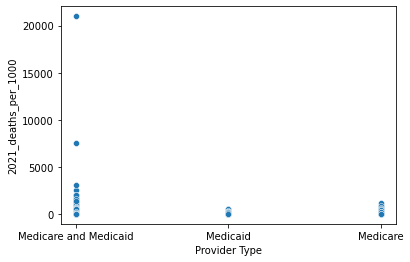

In [16]:
sns.scatterplot(x=df['Provider Type'],y=df['2021_deaths_per_1000']);

In [17]:
df.loc[df['2021_deaths_per_1000']>5000]

,Federal Provider Number,Provider Name,Provider City,Provider State,Provider Zip Code,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Provider Type,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid Services,Continuing Care Retirement Community,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,Percent Vaccinated Residents,Percent Vaccinated Healthcare Personnel,Rural versus Urban,Number of Beds,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Total Assets,Accounts payable,"Salaries, wages, and fees payable",Total liabilities,Total fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Gross Revenue,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Income,Net Income
3075,145229,HERITAGE HEALTH-SPRINGFIELD,SPRINGFIELD,IL,62702,Sangamon,For profit - Corporation,178,115.9,Medicare and Medicaid,N,10/1/1973,N,N,N,N,Resident,Yes,1.0,2.0,1.0,2.0,2.0,2.32919,0.99580,0.41999,1.41579,3.74498,0.02840,2.18844,0.90233,0.42261,3.51638,94.0,0,29,2.0,3,85746.83,0,3,1155.56,122.22,114000.0,21000.0,100.0,100.0,U,177.0,8292894.0,9390587.0,3169845.0,1067293.0,5712614.0,20053304.0,2085400.0,NaN,10600186.0,9453118.0,10902454.0,18043306.0,18043306.0,11822564.0,14581002.0,-2758438.0,-2748045.0,-2748045.0
14930,675225,FOCUSED CARE AT BAYTOWN,BAYTOWN,TX,77520,Harris,For profit - Limited Liability company,100,18.1,Medicare and Medicaid,N,11/29/1993,N,N,Y,N,Resident,Yes,3.0,4.0,4.0,1.0,1.0,3.75887,2.69831,0.54693,3.24525,7.00411,0.03889,3.35548,2.08474,0.15988,4.87434,28.0,1,1,0.0,0,0.00,0,0,92.31,415.38,1000.0,7500.0,0.0,79.7,U,100.0,3374932.0,3043746.0,1257524.0,277196.0,1956028.0,1363396.0,630312.0,113984.0,744296.0,619100.0,7763002.0,7979940.0,7979940.0,5856070.0,5217662.0,638408.0,533938.0,533938.0


Further outlier removal due to data being misrepresented. 

In [18]:
df.drop(index=3075,inplace=True)
df.drop(index=3231,inplace=True)
df.drop(index=4544,inplace=True)
df.drop(index=9242,inplace=True)
df.drop(index=13111,inplace=True)
df=df.loc[df['2021_cases_per_1000']>5]

df.reset_index()

,index,Federal Provider Number,Provider Name,Provider City,Provider State,Provider Zip Code,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Provider Type,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid Services,Continuing Care Retirement Community,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,Percent Vaccinated Residents,Percent Vaccinated Healthcare Personnel,Rural versus Urban,Number of Beds,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Total Assets,Accounts payable,"Salaries, wages, and fees payable",Total liabilities,Total fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Gross Revenue,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Income,Net Income
0,0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,35653,Franklin,For profit - Corporation,57,53.2,Medicare and Medicaid,N,9/1/1969,N,N,Y,N,Both,Yes,5.0,5.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333,0,0,0.0,0,0.00,0,0,905.66,94.34,905.66,94.34,NaN,NaN,R,57.0,2151372.0,936818.0,610630.0,414202.0,2426400.0,1724846.0,89387.0,101599.0,184933.0,1539913.0,4395342.0,5332160.0,5332160.0,4727863.0,4601512.0,126351.0,135292.0,135292.0
1,1,15010,COOSA VALLEY HEALTHCARE CENTER,SYLACAUGA,AL,35150,Talladega,For profit - Corporation,85,72.5,Medicare and Medicaid,N,1/1/1967,N,N,Y,N,Both,Yes,4.0,3.0,4.0,5.0,5.0,2.69344,0.91942,0.90290,1.82232,4.51576,0.01307,2.82510,1.04987,1.27671,4.98569,18.667,0,0,0.0,1,650.00,0,1,295.08,32.79,276.32,26.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,15012,HIGHLANDS HEALTH AND REHAB,SCOTTSBORO,AL,35768,Jackson,Government - County,50,40.3,Medicare and Medicaid,Y,1/1/1967,N,N,Y,N,Resident,Yes,1.0,2.0,3.0,1.0,1.0,1.32635,0.32881,0.43187,0.76068,2.08703,0.00000,1.28876,0.32669,0.49089,2.07468,30.667,0,0,0.0,0,0.00,0,0,392.86,107.14,305.56,83.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,BIRMINGHAM,AL,35206,Jefferson,For profit - Individual,92,68.1,Medicare and Medicaid,N,1/1/1967,N,N,N,N,Both,Yes,3.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.667,0,0,0.0,0,0.00,0,0,465.75,0.00,871.43,28.57,NaN,NaN,U,90.0,4327094.0,1258924.0,943426.0,703343.0,3093623.0,-62865.0,350067.0,129064.0,1182602.0,-1245467.0,5250439.0,6509363.0,6509363.0,7029701.0,7420717.0,-391016.0,-348410.0,-742239.0
4,4,15015,PLANTATION MANOR NURSING HOME,MC CALLA,AL,35111,Jefferson,For profit - Individual,103,75.7,Medicare and Medicaid,N,7/1/1971,N,N,N,N,Resident,Yes,3.0,3.0,3.0,3.0,2.0,2.23481,1.11304,0.35233,1.46537,3.70018,0.01198,2.41320,1.33398,0.50112,4.21466,16.000,0,1,0.0,4,31235.75,0,4,139.53,0.00,324.68,0.00,Na

In [19]:
df['Provider Type'].value_counts()

Medicare and Medicaid    13283
Medicare                   496
Medicaid                   190
Name: Provider Type, dtype: int64

In [20]:
df['Ownership Type'].value_counts()

For profit - Corporation                  6856
Non profit - Corporation                  2446
For profit - Limited Liability company    1696
For profit - Individual                    749
For profit - Partnership                   666
Non profit - Church related                351
Non profit - Other                         351
Government - County                        347
Government - Hospital district             228
Government - State                         125
Government - City                           76
Government - City/county                    67
Government - Federal                        11
Name: Ownership Type, dtype: int64

In [21]:
df['Rural versus Urban'].value_counts()

U    9330
R    3632
Name: Rural versus Urban, dtype: int64

In [22]:
df['Automatic Sprinkler Systems in All Required Areas'].value_counts()

Yes                   13945
Partial                  23
Data Not Available        1
Name: Automatic Sprinkler Systems in All Required Areas, dtype: int64

In [23]:
df['With a Resident and Family Council'].value_counts()

Resident    11143
Both         2144
None          655
Family         27
Name: With a Resident and Family Council, dtype: int64

Let's binarize the the categorical columns for future modeling.

In [24]:
# cols = ['Provider Resides in Hospital','Continuing Care Retirement Community','Abuse Icon','Most Recent Health Inspection More Than 2 Years Ago','Provider Changed Ownership in Last 12 Months']
df['Provider Resides in Hospital'] = df['Provider Resides in Hospital'].replace(['N','Y'],[0,1])
df['Abuse Icon'] = df['Abuse Icon'].replace(['N','Y'],[0,1])
df['Continuing Care Retirement Community'] = df['Continuing Care Retirement Community'].replace(['N','Y'],[0,1])
df['Most Recent Health Inspection More Than 2 Years Ago'] = df['Most Recent Health Inspection More Than 2 Years Ago'].replace(['N','Y'],[0,1])
df['Automatic Sprinkler Systems in All Required Areas'] = df['Automatic Sprinkler Systems in All Required Areas'].replace(['Partial','Yes','Data Not Available'],[0,1,np.nan])
df['Rural versus Urban'] = df['Rural versus Urban'].replace(['R','U'],[0,1])

Converting date founded to just the year.

In [25]:
df['Date First Approved to Provide Medicare and Medicaid Services'] = pd.to_datetime(df['Date First Approved to Provide Medicare and Medicaid Services']).dt.date

df['Date First Approved to Provide Medicare and Medicaid Services'] = pd.DatetimeIndex(df['Date First Approved to Provide Medicare and Medicaid Services']).year

In [26]:
df.head()

,Federal Provider Number,Provider Name,Provider City,Provider State,Provider Zip Code,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Provider Type,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid Services,Continuing Care Retirement Community,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,Percent Vaccinated Residents,Percent Vaccinated Healthcare Personnel,Rural versus Urban,Number of Beds,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Total Assets,Accounts payable,"Salaries, wages, and fees payable",Total liabilities,Total fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Gross Revenue,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Income,Net Income
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,35653,Franklin,For profit - Corporation,57,53.2,Medicare and Medicaid,0,1969,0,0,1,N,Both,1.0,5.0,5.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333,0,0,0.0,0,0.00,0,0,905.66,94.34,905.66,94.34,NaN,NaN,0.0,57.0,2151372.0,936818.0,610630.0,414202.0,2426400.0,1724846.0,89387.0,101599.0,184933.0,1539913.0,4395342.0,5332160.0,5332160.0,4727863.0,4601512.0,126351.0,135292.0,135292.0
1,15010,COOSA VALLEY HEALTHCARE CENTER,SYLACAUGA,AL,35150,Talladega,For profit - Corporation,85,72.5,Medicare and Medicaid,0,1967,0,0,1,N,Both,1.0,4.0,3.0,4.0,5.0,5.0,2.69344,0.91942,0.90290,1.82232,4.51576,0.01307,2.82510,1.04987,1.27671,4.98569,18.667,0,0,0.0,1,650.00,0,1,295.08,32.79,276.32,26.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15012,HIGHLANDS HEALTH AND REHAB,SCOTTSBORO,AL,35768,Jackson,Government - County,50,40.3,Medicare and Medicaid,1,1967,0,0,1,N,Resident,1.0,1.0,2.0,3.0,1.0,1.0,1.32635,0.32881,0.43187,0.76068,2.08703,0.00000,1.28876,0.32669,0.49089,2.07468,30.667,0,0,0.0,0,0.00,0,0,392.86,107.14,305.56,83.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,BIRMINGHAM,AL,35206,Jefferson,For profit - Individual,92,68.1,Medicare and Medicaid,0,1967,0,0,0,N,Both,1.0,3.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.667,0,0,0.0,0,0.00,0,0,465.75,0.00,871.43,28.57,NaN,NaN,1.0,90.0,4327094.0,1258924.0,943426.0,703343.0,3093623.0,-62865.0,350067.0,129064.0,1182602.0,-1245467.0,5250439.0,6509363.0,6509363.0,7029701.0,7420717.0,-391016.0,-348410.0,-742239.0
4,15015,PLANTATION MANOR NURSING HOME,MC CALLA,AL,35111,Jefferson,For profit - Individual,103,75.7,Medicare and Medicaid,0,1971,0,0,0,N,Resident,1.0,3.0,3.0,3.0,3.0,2.0,2.23481,1.11304,0.35233,1.46537,3.70018,0.01198,2.41320,1.33398,0.50112,4.21466,16.000,0,1,0.0,4,31235.75,0,4,139.53,0.00,324.68,0.00,NaN,NaN,1.0,103.0,4381114.0,759118

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13969 entries, 0 to 15842
Data columns (total 67 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Federal Provider Number                                          13969 non-null  object 
 1   Provider Name                                                    13969 non-null  object 
 2   Provider City                                                    13969 non-null  object 
 3   Provider State                                                   13969 non-null  object 
 4   Provider Zip Code                                                13969 non-null  int64  
 5   Provider County Name                                             13969 non-null  object 
 6   Ownership Type                                                   13969 non-null  object 
 7   Number of Certified Beds                

In [28]:
df['Ownership Type'].value_counts(normalize=True)

For profit - Corporation                  0.490801
Non profit - Corporation                  0.175102
For profit - Limited Liability company    0.121412
For profit - Individual                   0.053619
For profit - Partnership                  0.047677
Non profit - Church related               0.025127
Non profit - Other                        0.025127
Government - County                       0.024841
Government - Hospital district            0.016322
Government - State                        0.008948
Government - City                         0.005441
Government - City/county                  0.004796
Government - Federal                      0.000787
Name: Ownership Type, dtype: float64

Limiting this category to the most interesting aspect of each variable, which is easier to interpret and helps with imbalance. This will be dummefied for modeling but left as an object for further eda.

In [29]:
df['Ownership Type'] = df['Ownership Type'].apply(lambda x:'government' if 'Government' in x else x)
df['Ownership Type'] = df['Ownership Type'].apply(lambda x:'for_profit' if 'For profit' in x else x)
df['Ownership Type'] = df['Ownership Type'].apply(lambda x:'non_profit' if 'Non profit' in x else x)

In [30]:
df['Ownership Type'].value_counts(normalize=True)

for_profit    0.713508
non_profit    0.225356
government    0.061135
Name: Ownership Type, dtype: float64

An unhelpful column that is very imbalanced 99%+ to <1%

In [31]:
df=df.drop(columns=['Provider Type'])

Making another binary column.

In [32]:
df['Provider Changed Ownership in Last 12 Months'] = df['Provider Changed Ownership in Last 12 Months'].apply(lambda x:1 if x=='N' else 0)

In [33]:
df['Provider Changed Ownership in Last 12 Months'].value_counts(normalize=True)

1    0.982819
0    0.017181
Name: Provider Changed Ownership in Last 12 Months, dtype: float64

In [34]:
df['With a Resident and Family Council'].value_counts(normalize=True)

Resident    0.797695
Both        0.153483
None        0.046890
Family      0.001933
Name: With a Resident and Family Council, dtype: float64

In [35]:
df.loc[(df['With a Resident and Family Council']== 'Resident') & (df['2021_deaths_per_1000']>6000)]

,Federal Provider Number,Provider Name,Provider City,Provider State,Provider Zip Code,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid Services,Continuing Care Retirement Community,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,Percent Vaccinated Residents,Percent Vaccinated Healthcare Personnel,Rural versus Urban,Number of Beds,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Total Assets,Accounts payable,"Salaries, wages, and fees payable",Total liabilities,Total fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Gross Revenue,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Income,Net Income
14930,675225,FOCUSED CARE AT BAYTOWN,BAYTOWN,TX,77520,Harris,for_profit,100,18.1,0,1993,0,0,1,1,Resident,1.0,3.0,4.0,4.0,1.0,1.0,3.75887,2.69831,0.54693,3.24525,7.00411,0.03889,3.35548,2.08474,0.15988,4.87434,28.0,1,1,0.0,0,0.0,0,0,92.31,415.38,1000.0,7500.0,0.0,79.7,1.0,100.0,3374932.0,3043746.0,1257524.0,277196.0,1956028.0,1363396.0,630312.0,113984.0,744296.0,619100.0,7763002.0,7979940.0,7979940.0,5856070.0,5217662.0,638408.0,533938.0,533938.0


In [36]:
df.loc[df['2020_deaths_per_1000']>3000]

,Federal Provider Number,Provider Name,Provider City,Provider State,Provider Zip Code,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid Services,Continuing Care Retirement Community,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,Percent Vaccinated Residents,Percent Vaccinated Healthcare Personnel,Rural versus Urban,Number of Beds,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Total Assets,Accounts payable,"Salaries, wages, and fees payable",Total liabilities,Total fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Gross Revenue,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Income,Net Income
15296,675896,RIVER CITY CARE CENTER,SAN ANTONIO,TX,78202,Bexar,for_profit,100,10.4,0,2001,0,0,0,1,Both,1.0,2.0,1.0,4.0,5.0,5.0,2.69912,2.16112,1.40739,3.56852,6.26764,0.0,2.30269,1.78645,1.15556,5.28285,332.0,13,27,9.0,2,236575.64,1,3,0.0,3250.0,105.26,684.21,93.8,94.4,1.0,100.0,3555116.0,2153274.0,845161.0,296910.0,2860305.0,101598.0,1466052.0,93285.0,1768705.0,-1667107.0,4239639.0,6392913.0,6392913.0,5390773.0,6415421.0,-1024648.0,-624742.0,-624742.0


<AxesSubplot:xlabel='With a Resident and Family Council', ylabel='2021_cases_per_1000'>

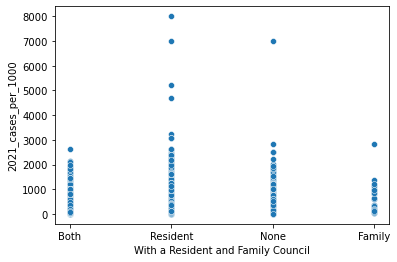

In [37]:
sns.scatterplot(data=df,x='With a Resident and Family Council',y='2021_cases_per_1000')

### Light feature engineering to see total deaths across two years.

In [38]:
# Code originally written by Jamie Squires
df['total_deaths_per_1000'] = df['2020_deaths_per_1000']+df['2021_deaths_per_1000']
df['total_cases_per_1000'] = df['2020_cases_per_1000']+df['2021_cases_per_1000']

In [39]:
df.columns

Index(['Federal Provider Number', 'Provider Name', 'Provider City',
       'Provider State', 'Provider Zip Code', 'Provider County Name',
       'Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents per Day', 'Provider Resides in Hospital',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Continuing Care Retirement Community', 'Abuse Icon',
       'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'RN Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reporte

In [40]:
reorder = ['Federal Provider Number', 'Provider Name',
           'total_deaths_per_1000', 'total_cases_per_1000','2020_cases_per_1000', '2020_deaths_per_1000', '2021_cases_per_1000',
       '2021_deaths_per_1000',
           'Provider City', 'Provider State',
       'Provider Zip Code', 'Provider County Name', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Provider Resides in Hospital',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Continuing Care Retirement Community', 'Abuse Icon',
       'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'RN Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Adjusted Nurse Aide Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
       'Total Weighted Health Survey Score',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints',
       'Number of Citations from Infection Control Inspections',
       'Number of Fines', 'Total Amount of Fines in Dollars',
       'Number of Payment Denials', 'Total Number of Penalties',
        'Percent Vaccinated Residents',
       'Percent Vaccinated Healthcare Personnel', 'Rural versus Urban',
       'Overhead Non-Salary Costs', 'Total Charges', 'Total Costs',
       'Wage-related Costs (core)', 'Total Salaries (adjusted)',
       'Total Assets', 'Accounts payable', 'Salaries, wages, and fees payable',
       'Total liabilities', 'Total fund balances',
       'Total General Inpatient Care Services Revenue', 'Inpatient Revenue',
       'Gross Revenue', 'Net Patient Revenue', 'Less Total Operating Expense',
       'Net Income from service to patients', 'Total Income', 'Net Income']

In [41]:
df= df[reorder]
df.head()

,Federal Provider Number,Provider Name,total_deaths_per_1000,total_cases_per_1000,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,Provider City,Provider State,Provider Zip Code,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid Services,Continuing Care Retirement Community,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Percent Vaccinated Residents,Percent Vaccinated Healthcare Personnel,Rural versus Urban,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Total Assets,Accounts payable,"Salaries, wages, and fees payable",Total liabilities,Total fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Gross Revenue,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Income,Net Income
0,15009,"BURNS NURSING HOME, INC.",188.68,1811.32,905.66,94.34,905.66,94.34,RUSSELLVILLE,AL,35653,Franklin,for_profit,57,53.2,0,1969,0,0,1,1,Both,1.0,5.0,5.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333,0,0,0.0,0,0.00,0,0,NaN,NaN,0.0,2151372.0,936818.0,610630.0,414202.0,2426400.0,1724846.0,89387.0,101599.0,184933.0,1539913.0,4395342.0,5332160.0,5332160.0,4727863.0,4601512.0,126351.0,135292.0,135292.0
1,15010,COOSA VALLEY HEALTHCARE CENTER,59.11,571.40,295.08,32.79,276.32,26.32,SYLACAUGA,AL,35150,Talladega,for_profit,85,72.5,0,1967,0,0,1,1,Both,1.0,4.0,3.0,4.0,5.0,5.0,2.69344,0.91942,0.90290,1.82232,4.51576,0.01307,2.82510,1.04987,1.27671,4.98569,18.667,0,0,0.0,1,650.00,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15012,HIGHLANDS HEALTH AND REHAB,190.47,698.42,392.86,107.14,305.56,83.33,SCOTTSBORO,AL,35768,Jackson,government,50,40.3,1,1967,0,0,1,1,Resident,1.0,1.0,2.0,3.0,1.0,1.0,1.32635,0.32881,0.43187,0.76068,2.08703,0.00000,1.28876,0.32669,0.49089,2.07468,30.667,0,0,0.0,0,0.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,28.57,1337.18,465.75,0.00,871.43,28.57,BIRMINGHAM,AL,35206,Jefferson,for_profit,92,68.1,0,1967,0,0,0,1,Both,1.0,3.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.667,0,0,0.0,0,0.00,0,0,NaN,NaN,1.0,4327094.0,1258924.0,943426.0,703343.0,3093623.0,-62865.0,350067.0,129064.0,1182602.0,-1245467.0,5250439.0,6509363.0,6509363.0,7029701.0,7420717.0,-391016.0,-348410.0,-742239.0
4,15015,PLANTATION MANOR NURSING HOME,0.00,464.21,139.53,0.00,324.68,0.00,MC CALLA,AL,35111,Jefferson,for_profit,103,75.7,0,1971,0,0,0,1,Resident,1.0,3.0,3.0,3.0,3.0,2.0,2.23481,1.11304,0.35233,1.46537,3.70018,0.01198,2.41320,1.33398,0.50112,4.21466,16.000,0,1,0.0,4,31235.75,0,4,NaN,NaN,1.0,4381114.0,759118.0,598340.0,507958.0,3245170.0,147958.0,543501.0,143684.0,793522.0,-645564.0,6145356.0,6904474.0,6904474.0,7176456.

New CSV without dummy columns for easier EDA

In [ ]:
#df.to_csv('../../data/no_dummies_pre_imputed.csv',index=False)

Dummify three categorical columns for modeling.

In [42]:
df = pd.get_dummies(df, columns=[
'Provider State',
'Ownership Type',
'With a Resident and Family Council',
],drop_first=True)

df.head()

,Federal Provider Number,Provider Name,total_deaths_per_1000,total_cases_per_1000,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,Provider City,Provider Zip Code,Provider County Name,Number of Certified Beds,Average Number of Residents per Day,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid Services,Continuing Care Retirement Community,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Percent Vaccinated Residents,Percent Vaccinated Healthcare Personnel,Rural versus Urban,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Total Assets,Accounts payable,"Salaries, wages, and fees payable",Total liabilities,Total fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Gross Revenue,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Income,Net Income,Provider State_AR,Provider State_AZ,Provider State_CA,Provider State_CO,Provider State_CT,Provider State_DE,Provider State_FL,Provider State_GA,Provider State_GU,Provider State_HI,Provider State_IA,Provider State_ID,Provider State_IL,Provider State_IN,Provider State_KS,Provider State_KY,Provider State_LA,Provider State_MA,Provider State_MD,Provider State_ME,Provider State_MI,Provider State_MN,Provider State_MO,Provider State_MS,Provider State_MT,Provider State_NC,Provider State_ND,Provider State_NE,Provider State_NJ,Provider State_NM,Provider State_NV,Provider State_NY,Provider State_OH,Provider State_OK,Provider State_OR,Provider State_PA,Provider State_PR,Provider State_RI,Provider State_SC,Provider State_SD,Provider State_TN,Provider State_TX,Provider State_UT,Provider State_VA,Provider State_VT,Provider State_WA,Provider State_WI,Provider State_WV,Provider State_WY,Ownership Type_government,Ownership Type_non_profit,With a Resident and Family Council_Family,With a Resident and Family Council_None,With a Resident and Family Council_Resident
0,15009,"BURNS NURSING HOME, INC.",188.68,1811.32,905.66,94.34,905.66,94.34,RUSSELLVILLE,35653,Franklin,57,53.2,0,1969,0,0,1,1,1.0,5.0,5.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333,0,0,0.0,0,0.00,0,0,NaN,NaN,0.0,2151372.0,936818.0,610630.0,414202.0,2426400.0,1724846.0,89387.0,101599.0,184933.0,1539913.0,4395342.0,5332160.0,5332160.0,4727863.0,4601512.0,126351.0,135292.0,135292.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15010,COOSA VALLEY HEALTHCARE CENTER,59.11,571.40,295.08,32.79,276.32,26.32,SYLACAUGA,35150,Talladega,85,72.5,0,1967,0,0,1,1,1.0,4.0,3.0,4.0,5.0,5.0,2.69344,0.91942,0.90290,1.82232,4.51576,0.01307,2.82510,1.04987,1.27671,4.98569,18.667,0,0,0.0,1,650.00,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15012,HIGHLANDS HEALTH AND REHAB,190.47,698.42,

Changing column names for conveience

In [43]:
df.columns = df.columns.str.replace(' ','_')

In [44]:
df.columns= df.columns.str.lower()

In [45]:
df.isna().sum().sort_values(ascending=False)

salaries,_wages,_and_fees_payable                                  2122
percent_vaccinated_healthcare_personnel                            1441
percent_vaccinated_residents                                       1435
accounts_payable                                                   1292
total_liabilities                                                  1117
total_assets                                                       1089
wage-related_costs_(core)                                          1073
total_fund_balances                                                1050
total_general_inpatient_care_services_revenue                      1039
inpatient_revenue                                                  1039
gross_revenue                                                      1039
net_patient_revenue                                                1039
net_income                                                         1037
total_income                                                    

### The following sections are to determine the best imputer by using a basic linear regression as reference model

In [46]:
X= df.drop(columns={'federal_provider_number', 'total_deaths_per_1000',
       'total_cases_per_1000', '2020_cases_per_1000', '2020_deaths_per_1000',
       '2021_cases_per_1000', '2021_deaths_per_1000', 'provider_city',
       'provider_zip_code', 'provider_county_name'})

X=X.select_dtypes(include=np.number)
y=df['total_deaths_per_1000']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [47]:
# Best imputer
pipe1 = Pipeline([
    ('simp', SimpleImputer()),
    ('lr', LinearRegression())
])

simp_params = {
     'simp__strategy': ['most_frequent','mean','median'],
    'lr__normalize':[True,False]
}

simp_gs = GridSearchCV(pipe1, 
                      param_grid = simp_params,
                      cv = 5)

simp_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simp', SimpleImputer()),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__normalize': [True, False],
                         'simp__strategy': ['most_frequent', 'mean', 'median']})

In [48]:
simp_gs.best_params_

{'lr__normalize': False, 'simp__strategy': 'most_frequent'}

In [49]:
simp_gs.best_estimator_.score(X_train,y_train),simp_gs.best_estimator_.score(X_test,y_test)

(0.07362153808805527, 0.04096561073025118)

In [50]:
X= df.drop(columns={'federal_provider_number', 'total_deaths_per_1000',
       'total_cases_per_1000', '2020_cases_per_1000', '2020_deaths_per_1000',
       '2021_cases_per_1000', '2021_deaths_per_1000', 'provider_city',
       'provider_zip_code', 'provider_county_name'})

X=X.select_dtypes(include=np.number)
y=df['total_deaths_per_1000']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [52]:
# Worse Imputer
it_imp = IterativeImputer()

X_imp_train = it_imp.fit_transform(X_train)
X_imp_test = it_imp.transform(X_test)
lr= LinearRegression()
lr.fit(X_imp_train,y_train)
lr.score(X_imp_train,y_train),lr.score(X_imp_test,y_test)

In [ ]:
#Worse Imputer
pipe2 = Pipeline([
    ('knn', KNNImputer()),
    ('lr', LinearRegression())
])

knn_params = {
     'knn__n_neighbors': range(1,51,10),
    'knn__weights':['uniform','distance'],
    'lr__normalize':[True,False]
}

knn_gs = GridSearchCV(pipe2, 
                      param_grid = knn_params,
                      cv = 5)

knn_gs.fit(X_train, y_train)

knn_gs.best_params_

knn_gs.best_estimator_.score(X_train,y_train),knn_gs.best_estimator_.score(X_test,y_test)

## Final CSV with full DataFrame imputation function for testing purposes

In [53]:
#df.to_csv('../../data/pre_imputed.csv',index=False)

In [55]:
#Function for imputing entire dataframe pre-ttsplit
#Warning: data leakage

def simple_impute(df):
    imp = SimpleImputer(strategy='most_frequent')

    imp_df = imp.fit_transform(df)

    df1 = pd.DataFrame(imp_df, columns = df.columns)
    return df1

In [56]:
df1=df.copy()

## Basic Model Iteration to Test Imputers

In [58]:
X= df.drop(columns={'2020_cases_per_1000','2020_deaths_per_1000','2021_cases_per_1000','2021_deaths_per_1000'})
X=X.select_dtypes(include=np.number)
y=df['2021_cases_per_1000']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)
imp = SimpleImputer(strategy = 'most_frequent')

it_imp = IterativeImputer()

X_imp_train = imp.fit_transform(X_train)
X_imp_test = imp.transform(X_test)
lr= LinearRegression()


lr.fit(X_imp_train,y_train)

lr.score(X_imp_train,y_train),lr.score(X_imp_test,y_test)

In [59]:
df['2021_deaths_per_1000'].mean()

129.5703887178746

In [60]:
df['2021_deaths_per_1000'].std()

145.98766987174372

In [61]:
df.loc[df['2021_deaths_per_1000']>127.50508450802938].shape

(5660, 118)

In [62]:
df.loc[df['2021_deaths_per_1000']<127.50508450802938].shape

(8309, 118)

In [63]:
df.shape[0] == 8590+5669

False

In [64]:
df.loc[df['2021_deaths_per_1000'] > 127.50508450802938, '2021_above_av_deaths'] = 1
df.loc[df['2021_deaths_per_1000'] < 127.50508450802938, '2021_above_av_deaths'] = 0

In [66]:
df['2021_above_av_deaths'].value_counts(normalize=True)

0.0    0.594817
1.0    0.405183
Name: 2021_above_av_deaths, dtype: float64

In [67]:
df['2021_above_av_deaths']=df['2021_above_av_deaths'].astype(int)

In [68]:
X= df.drop(columns={'2020_cases_per_1000','2020_deaths_per_1000','2021_cases_per_1000','2021_deaths_per_1000','2021_above_av_deaths'})
X=X.select_dtypes(include=np.number)
#y=df['2021_deaths_per_1000']
y=df['2021_above_av_deaths']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42,stratify=y)
imp = SimpleImputer(strategy = 'most_frequent')

it_imp = IterativeImputer()

X_imp_train = it_imp.fit_transform(X_train)
X_imp_test = it_imp.transform(X_test)
lr= LinearRegression()
logreg = LogisticRegression(solver='liblinear')

In [43]:
lr.fit(X_imp_train,y_train)

LinearRegression()

In [44]:
lr.score(X_imp_train,y_train), lr.score(X_imp_test,y_test)

(0.009447549047706727, -0.01108252567805712)

In [45]:
logreg.fit(X_imp_train,y_train)

LogisticRegression(solver='liblinear')

In [46]:
logreg.score(X_imp_train,y_train), logreg.score(X_imp_test,y_test)

(0.4524596733794209, 0.45605423094904163)

In [47]:
df_dropped_rows = df.dropna()
df_dropped_cols = df.dropna(axis=1)

In [48]:
X1= df_dropped_rows.drop(columns={'2020_cases_per_1000','2020_deaths_per_1000','2021_cases_per_1000','2021_deaths_per_1000','2021_above_av_deaths'})
X1= X1.select_dtypes(include=np.number)

X2= df_dropped_cols.drop(columns={'2020_cases_per_1000','2020_deaths_per_1000','2021_cases_per_1000','2021_deaths_per_1000','2021_above_av_deaths'})
X2=X2.select_dtypes(include=np.number)

y1= df_dropped_rows['2021_deaths_per_1000']
y2= df_dropped_cols['2021_deaths_per_1000']

y_1=df_dropped_rows['2021_above_av_deaths']
y_2=df_dropped_cols['2021_above_av_deaths']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=.3,random_state=42)

In [60]:
lr=LinearRegression()

In [61]:
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.054217789661114235, 0.003466123768049778)

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=.3,random_state=42)

In [64]:
lr=LinearRegression()

In [65]:
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.005579974943245913, 0.007647839576976012)

In [53]:
y_1.value_counts(normalize=True)

0    0.588442
1    0.411558
Name: 2021_above_av_deaths, dtype: float64

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X1,y_1,test_size=.3,random_state=42,)

In [61]:
logreg=LogisticRegression(solver='liblinear')

In [55]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [56]:
logreg.score(X_train,y_train),logreg.score(X_test,y_test)

(0.5964314679643147, 0.5830495648883844)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X2,y_2,test_size=.3,random_state=42,stratify=y)

In [62]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [63]:
logreg.score(X_train,y_train),logreg.score(X_test,y_test)

(0.6017433122933574, 0.6016830294530154)

In [66]:
y_2.value_counts(normalize=True)

0    0.602427
1    0.397573
Name: 2021_above_av_deaths, dtype: float64